# Anggota
1. **Putri Rizki Amalia - 17751**
2. **Abdul Hamid Umar - 17843**
3. **Gregorius Aria Neruda - 17958**

Data diambil dari http://data.insideairbnb.com/united-states/ma/boston/2019-12-04/visualisations/listings.csv

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')
df.head()

id                                              name  host_id host_name  \
0   5506    **$79 Special **   Private! Minutes to center!     8229     Terry   
1   6695                    $99 Special!! Home Away! Condo     8229     Terry   
2   8789               Curved Glass Studio/1bd facing Park    26988      Anne   
3  10730                    Bright 1bed facing Golden Dome    26988      Anne   
4  10811  Back Bay Apt Studio-3 blocks to Pru center & "T"    38997  Michelle   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Roxbury  42.32981  -71.09559  Entire home/apt   
1                  NaN       Roxbury  42.32994  -71.09351  Entire home/apt   
2                  NaN      Downtown  42.35919  -71.06265  Entire home/apt   
3                  NaN      Downtown  42.35840  -71.06185  Entire home/apt   
4                  NaN      Back Bay  42.34973  -71.08792  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    145               3                106  2019-10-31               0.81   
1    169               3                115  2019-11-02               0.91   
2     99              32                 24  2019-09-30               0.37   
3    150              91                 30  2019-09-14               0.24   
4     84              90                  9  2019-07-22               0.19   

   calculated_host_listings_count  availability_365  
0                               6                27  
1                               6                18  
2                              10               186  
3                              10               240  
4                               7               336

Setelah melihat preview dari datanya, selanjutnya kita lihat dimensi dari data

In [3]:
df.shape

(3507, 16)

Data memiliki 3507 baris dan 16 kolom

## Proses Cleaning

### Mencari data kosong

In [4]:
df.isnull().any()

id                                False
name                              False
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

Dari hasil output cell sebelumnya, dapat dilihat terdapat beberapa kolom yang memiliki data kosong, diantaranya:

1. `host_name`
2. `neighbourhood_group`  
3. `last_review`
4. `reviews_per_month` 

In [5]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                           15
neighbourhood_group               3507
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        684
reviews_per_month                  684
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Dapat dilihat cacah data yang kosong:

1. `host_name`: 15
2. `neighbourhood_group`: 3507  
3. `last_review`: 684 
4. `reviews_per_month`: 684 

### Menghapus neighbourhood_group 
Karena cacah data kosong pada `neighbourhood_group` sama dengan dimensi, kita hapus kolom `neigbourhood_group`

In [6]:
df = df.drop(['neighbourhood_group'], axis=1)

### Menghapus listing yang tidak memiliki review (baris last_review dan reviews_per_month kosong)

In [7]:
df = df.dropna(subset=['last_review', 'reviews_per_month'])

### Mengganti value `host_name` kosong (`NaN`) menjadi `Unknown`

In [8]:
df = df.fillna('Unknown')

### Mengganti nama kolom "price" menjadi "price_in_usd"

In [9]:
df = df.rename(columns={"price": "price_in_usd"})

## Data Hasil Cleaning

In [10]:
df

id                                               name    host_id  \
0         5506     **$79 Special **   Private! Minutes to center!       8229   
1         6695                     $99 Special!! Home Away! Condo       8229   
2         8789                Curved Glass Studio/1bd facing Park      26988   
3        10730                     Bright 1bed facing Golden Dome      26988   
4        10811   Back Bay Apt Studio-3 blocks to Pru center & "T"      38997   
...        ...                                                ...        ...   
3445  40302103  Celebrate life/events mn2 Downtown Free Stparking  292030808   
3452  40343727     Stylish King 3.6mi to Downtown Freak walk to T  292030808   
3453  40344083  2Double/sofabed 3.6mi to Downtown Freak walk to T  292030808   
3454  40344334    Cozy Double 3.6mi to Downtown Freeprk walk to T  292030808   
3491  40512386             Venn | Downtown Crossing | Quite 1-bed  277913848   

         host_name neighbourhood  latitude  longitude        room_type  \
0            Terry       Roxbury  42.32981  -71.09559  Entire home/apt   
1            Terry       Roxbury  42.32994  -71.09351  Entire home/apt   
2             Anne      Downtown  42.35919  -71.06265  Entire home/apt   
3             Anne      Downtown  42.35840  -71.06185  Entire home/apt   
4         Michelle      Back Bay  42.34973  -71.08792  Entire home/apt   
...            ...           ...       ...        ...              ...   
3445  Eder & Marco    Dorchester  42.31387  -71.06515  Entire home/apt   
3452  Eder & Marco    Dorchester  42.31205  -71.06541     Private room   
3453  Eder & Marco    Dorchester  42.31396  -71.06676     Private room   
3454  Eder & Marco    Dorchester  42.31329  -71.06521     Private room   
3491          Venn     Chinatown  42.35187  -71.05924  Entire home/apt   

      price_in_usd  minimum_nights  number_of_reviews last_review  \
0              145               3                106  2019-10-31   
1              169               3                115  2019-11-02   
2               99              32                 24  2019-09-30   
3              150              91                 30  2019-09-14   
4               84              90                  9  2019-07-22   
...            ...             ...                ...         ...   
3445           107               2                  1  2019-11-25   
3452            36               3                  1  2019-11-25   
3453            58               3                  1  2019-11-25   
3454            36               3                  1  2019-11-25   
3491           195               2                  1  2019-12-03   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                  0.81                               6                27  
1                  0.91                               6                18  
2                  0.37                              10               186  
3                  0.24                              10               240  
4                  0.19                               7               336  
...                 ...                             ...               ...  
3445               1.00                               5               308  
3452               1.00                               5                64  
3453               1.00                               5                69  
3454               1.00                               5                65  
3491               1.00                               6               205  

[2823 rows x 15 columns]

# Exploratory Data Analysis

In [11]:
import seaborn as sns

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price_in_usd                        int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Continuous Numerical Variable

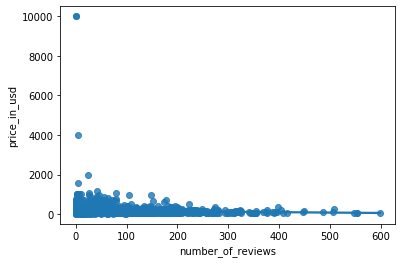

In [12]:
# hubungan cacah review dengan harga listing
sns.regplot(x='number_of_reviews', y='price_in_usd', data=df)

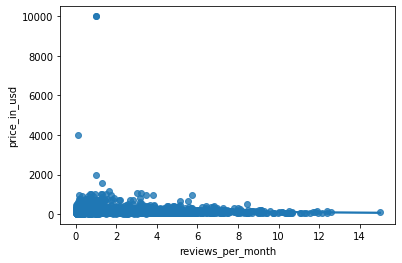

In [13]:
# hubungan review per bulan dengan harga listing
sns.regplot(x='reviews_per_month', y='price_in_usd', data=df)

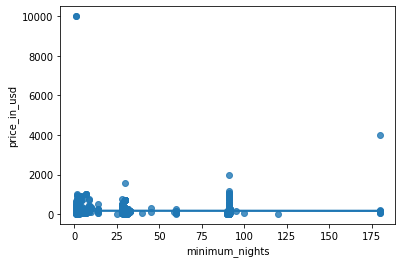

In [14]:
# hubungan minimum nights dengan harga listing
sns.regplot(x='minimum_nights', y='price_in_usd', data=df)

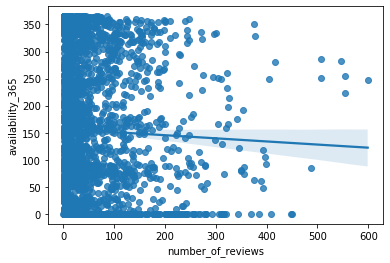

In [15]:
# hubungan cacah review dengan ketersediaan dalam satu tahun
sns.regplot(x='number_of_reviews', y='availability_365', data=df)

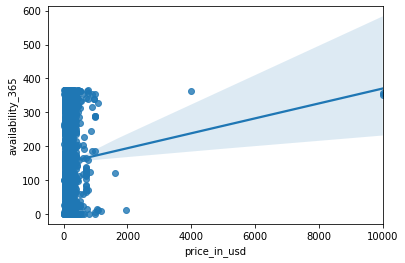

In [16]:
# hubungan harga listing dengan ketersediaan dalam satu tahun
sns.regplot(x='price_in_usd', y='availability_365', data=df)

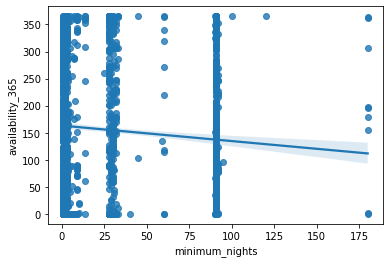

In [17]:
# hubungan minimum nights dengan ketersediaan dalam satu tahun
sns.regplot(x='minimum_nights', y='availability_365', data=df)

## Categorical Variable

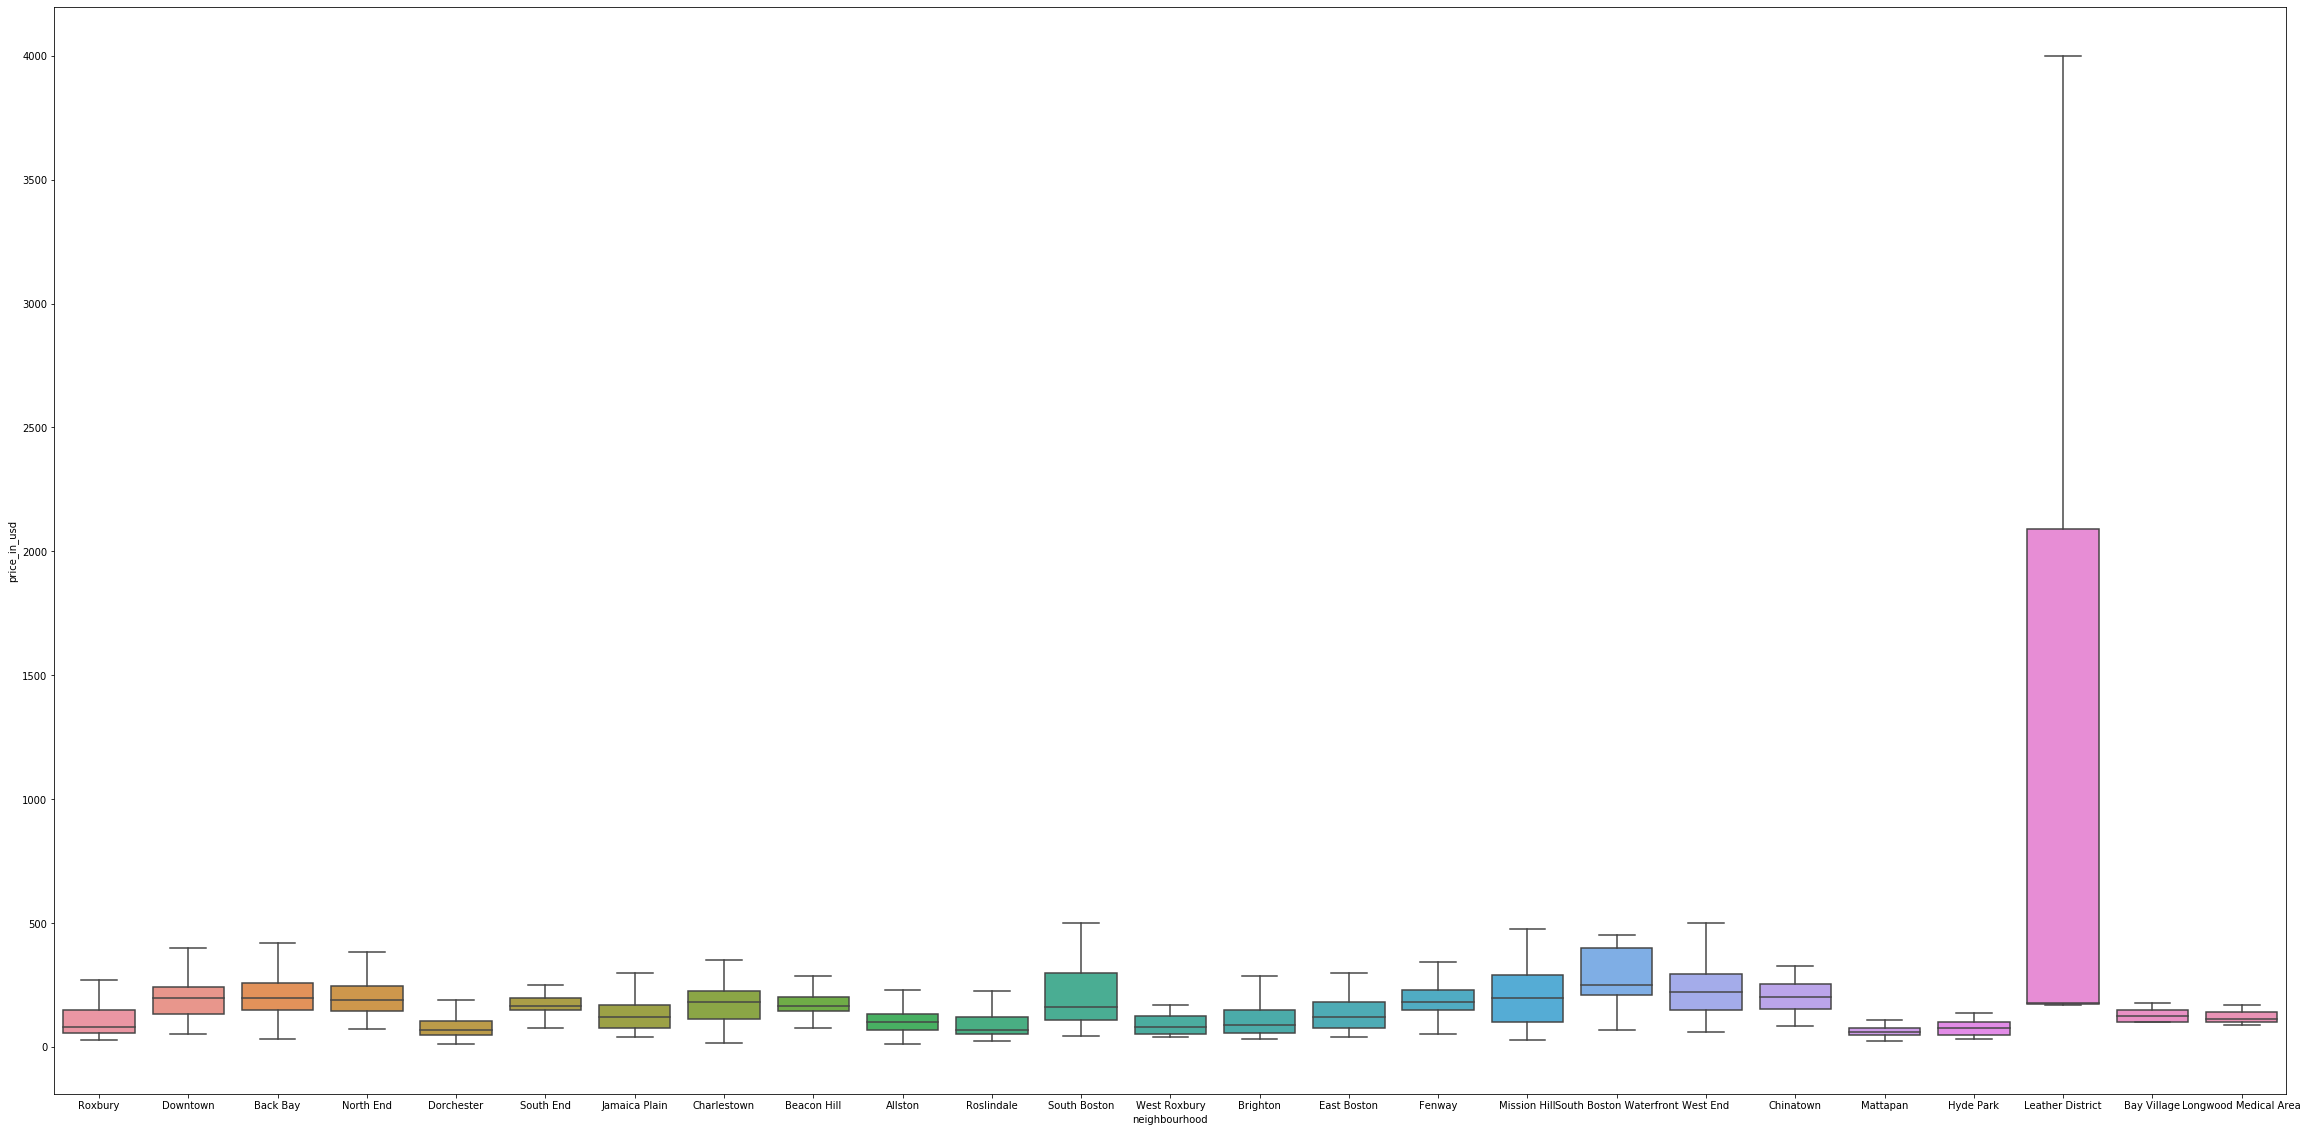

In [18]:
# plot neighbourhood dengan harga
plt.figure(figsize=(40,20))
sns.boxplot(x='neighbourhood', y='price_in_usd', data=df, showfliers=False)

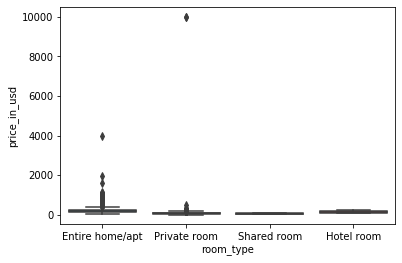

In [19]:
# plot bentuk kamar dengan harga
sns.boxplot(x='room_type', y='price_in_usd', data=df)

Terdapat outlier, sulit untuk mendapatkan perspektif karena range `price_in_usd` menjadi besar. Selanjutnya outlier akan di-*discard*

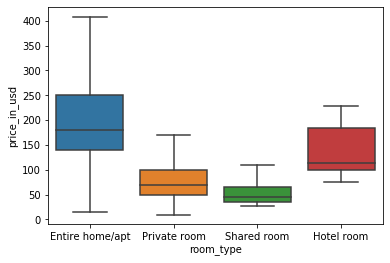

In [20]:
sns.boxplot(x='room_type', y='price_in_usd', data=df, showfliers=False)

Ruangan tipe `Entire home/apt` memiliki rata-rata harga paling tinggi dibandingkan tipe ruangan lain, dan ruangan tipe `Shared room` memiliki rata-rata harga paling rendah.

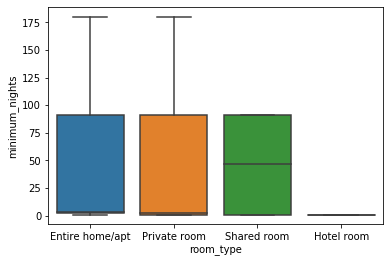

In [29]:
# plot tipe kamar dengan minimum nights
sns.boxplot(x='room_type', y='minimum_nights', data=df)

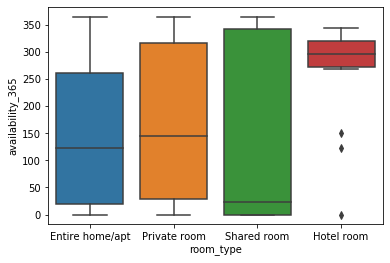

In [28]:
sns.boxplot(x='room_type', y='availability_365', data=df)

Boxplot hubungan antara tipe kamar dengan ketersediaannya dalam satu tahun, dapat dilihat bahwa tipe kamar `Shared room` memiliki rata-rata ketersediaan paling rendah, dan tipe kamar `Hotel room` memiliki rata-rata ketersediaan yang paling tinggi.

## Statistical Descriptive

In [23]:
df['neighbourhood'].value_counts()

Dorchester                 330
Downtown                   244
Jamaica Plain              222
South End                  214
Back Bay                   188
Roxbury                    181
Allston                    171
Fenway                     165
East Boston                159
South Boston               142
Brighton                   126
Beacon Hill                101
Mission Hill                84
North End                   75
Charlestown                 66
Roslindale                  65
West End                    52
West Roxbury                45
Bay Village                 42
South Boston Waterfront     41
Mattapan                    36
Chinatown                   35
Hyde Park                   33
Longwood Medical Area        3
Leather District             3
Name: neighbourhood, dtype: int64

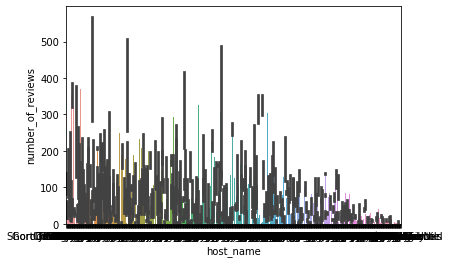

In [24]:
# plot nama host dengan cacah review
sns.barplot(x='host_name', y='number_of_reviews', data=df)

In [25]:
# A general function for horizontal bar plots in descending order
# Size = 12x6
def descendingBarh(column: str):
    x = df[column].value_counts().sort_values().tolist()
    y = df[column].value_counts().sort_values().keys().tolist()
    color = []
    for i in range(len(y)):
        total = sum(x)
        percentage = (x[i] / total) * 100
        y[i] = y[i] + f" {percentage:.1f}%"
        color.append(np.random.rand(3,))

    plt.figure(figsize=(12,6))
    plt.barh(y, x, height=0.7, color=color)
    plt.show()

Dengan adanya fungsi umum tersebut, kita dapat memanggilnya berkali-kali untuk memvisualisasi *plot* tentang statistik suatu kolom. 

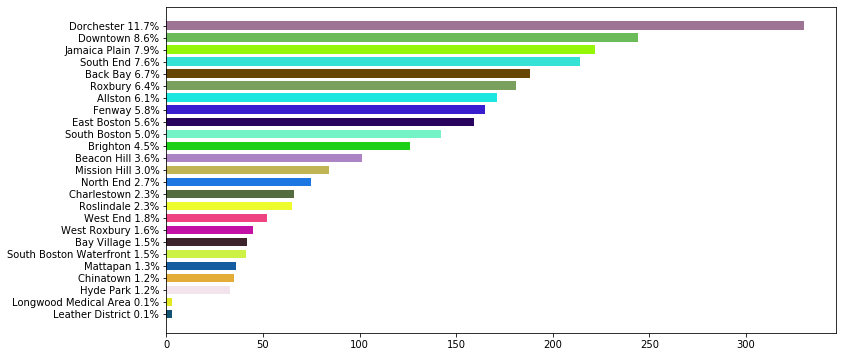

In [26]:
descendingBarh('neighbourhood')

Menggunakan fungsi `descendingBarh()` untuk memvisualisasi kolom `neighbourhood`. 


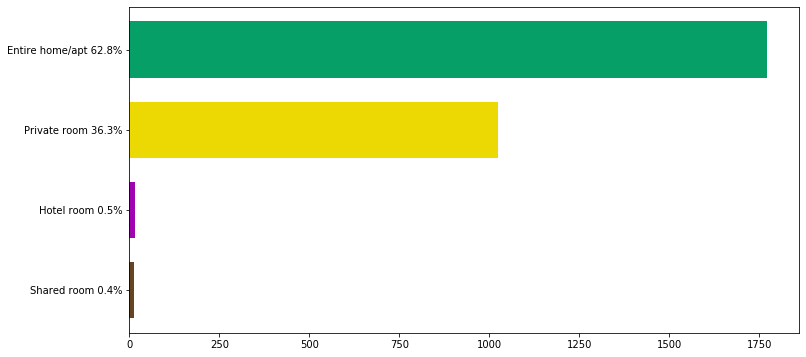

In [27]:
descendingBarh('room_type')

Menggunakan fungsi `descendingBarh()` untuk memvisualisasi kolom `room_type`.